# Load library

In [105]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import classification_report

from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# Load Datasest

In [106]:
#memanggil data csv
df= pd.read_csv('NEXIUM 20MG TAB.csv', sep=';', usecols=['Tanggal','Bulan', 'Jumlah Obat', 'Harga Satuan', 'Harga Total','Jumlah Pengunjung'])
df.head()

,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
0,5,1,15,16801,252010,1
1,6,1,3,16801,50402,1
2,7,1,5,16801,84003,2
3,8,1,18,16801,302412,5
4,9,1,78,16801,1310453,4


In [107]:
df.shape

(305, 6)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
Tanggal              305 non-null int64
Bulan                305 non-null int64
Jumlah Obat          305 non-null int64
Harga Satuan         305 non-null int64
Harga Total          305 non-null int64
Jumlah Pengunjung    305 non-null int64
dtypes: int64(6)
memory usage: 14.4 KB


In [109]:
df.describe()

,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
count,305.000000,305.000000,305.000000,305.0,3.050000e+02,305.000000
mean,14.360656,6.737705,16.003279,16801.0,2.688660e+05,3.514754
std,7.700890,3.408106,10.448967,0.0,1.755498e+05,2.338313
min,1.000000,1.000000,1.000000,16801.0,1.680100e+04,1.000000
25%,8.000000,4.000000,10.000000,16801.0,1.680070e+05,1.000000
50%,14.000000,7.000000,15.000000,16801.0,2.520100e+05,3.000000
75%,21.000000,10.000000,21.000000,16801.0,3.528140e+05,5.000000
max,29.000000,12.000000,78.000000,16801.0,1.310453e+06,10.000000


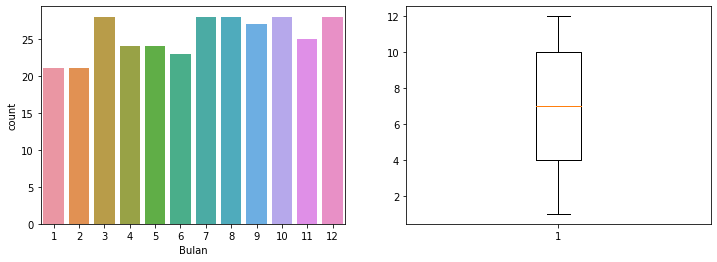

In [110]:
#Univariate analysis bulan
#Melihat distribusi dari bulan
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Bulan'])

f.add_subplot(1,2,2)
plt.boxplot(df['Bulan'])
plt.show()

- Dapat dilihat bahwa sebagian besar jumlah transaksi paling banyak dilakukan dibulan 3 dan 8

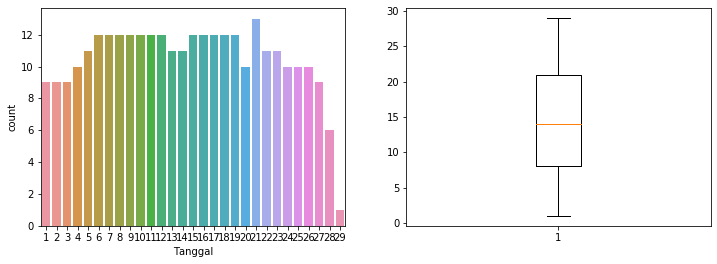

In [111]:
#Univariate analysis bathrooms
#Melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Tanggal'])

f.add_subplot(1,2,2)
plt.boxplot(df['Tanggal'])
plt.show()

- Jumlah transaksi penjualan obat paling banyak berada pada tanggal 21

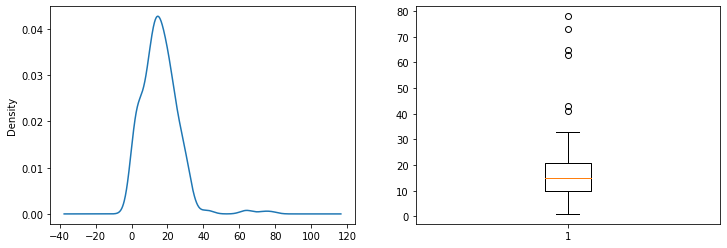

In [112]:
#Univariate analysis Jumlah Obat
#Melihat distribusi dari Jumlah Obat
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Jumlah Obat'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Jumlah Obat'])
plt.show()

- Density dari distribusi jumlah obat paling banyak dibeli berada di sekitar angka 10-20

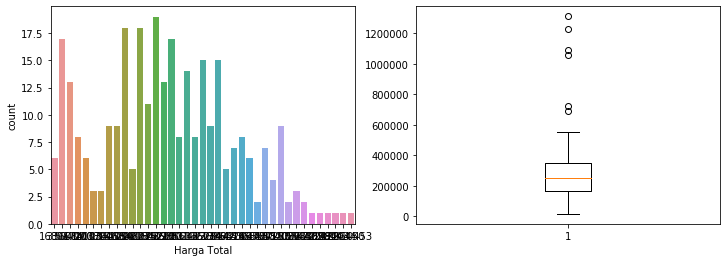

In [113]:
#Univariate analysis Harga Total
#Melihat distribusi dari Harga Total
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Harga Total'])

f.add_subplot(1,2,2)
plt.boxplot(df['Harga Total'])
plt.show()

- dapat dilihat total harga setiap transaksi paling banyak pada angka Rp.300.000

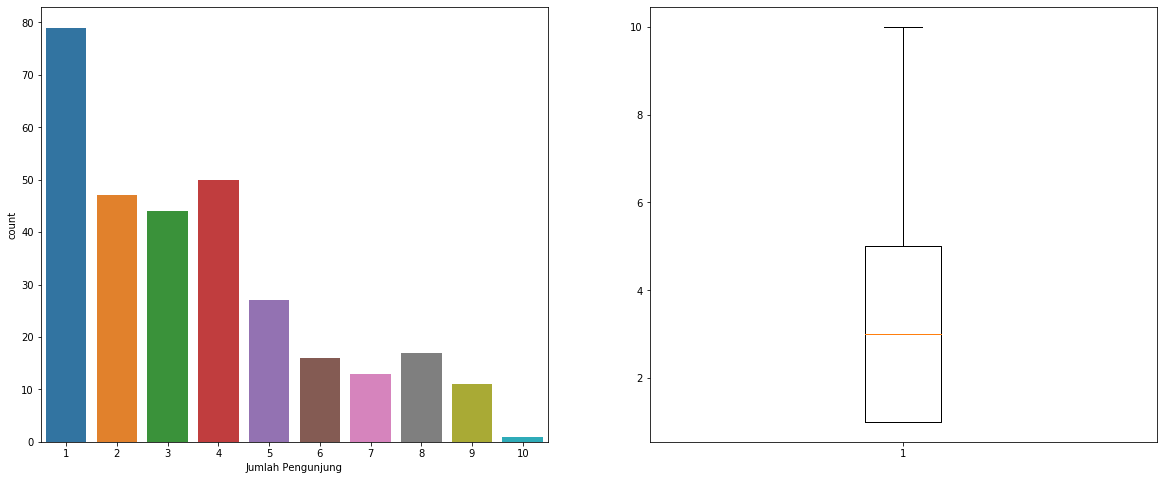

In [114]:
#Univariate analysis yr_built
#Melihat distribusi dari yr_built
f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['Jumlah Pengunjung'])

f.add_subplot(1,2,2)
plt.boxplot(df['Jumlah Pengunjung'])
plt.show()

- Dapat dilihat bahwa rata-rata jumlah pengunjung yang datang setiap setiap tanggalnya sebanyak 7 orang

C:\Users\ITD-STU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

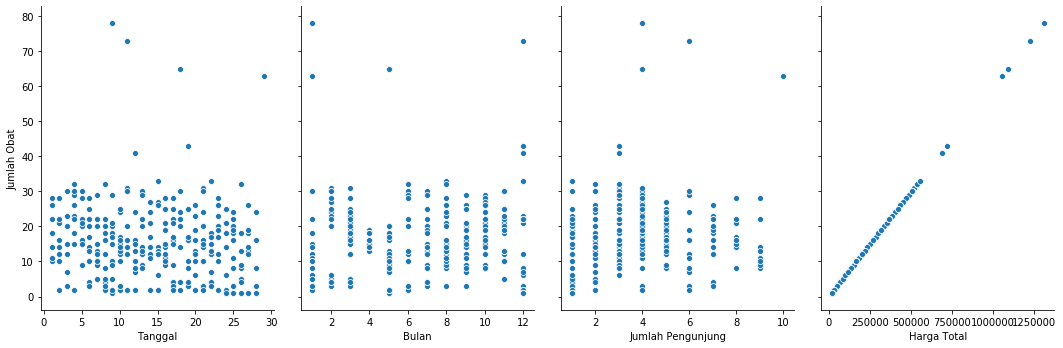

In [115]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Tanggal', 'Bulan', 'Jumlah Pengunjung', 'Harga Total'], y_vars=['Jumlah Obat'], size=5, aspect=0.75)
plt.show()

In [116]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
Tanggal,1,-0.041,-0.062,nan,-0.062,-0.028
Bulan,-0.041,1,0.035,nan,0.035,0.044
Jumlah Obat,-0.062,0.035,1,nan,1,0.25
Harga Satuan,nan,nan,nan,nan,nan,nan
Harga Total,-0.062,0.035,1,nan,1,0.25
Jumlah Pengunjung,-0.028,0.044,0.25,nan,0.25,1


- Dari tabel korelasi diatas, dapat dilihat bahwa harga total mempunyai hubungan linear positif yang sangat kuat dengan jumlah obat jika dibandingkan yang lain.

# Handling Missing Value

In [117]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

Tanggal              0
Bulan                0
Jumlah Obat          0
Harga Satuan         0
Harga Total          0
Jumlah Pengunjung    0
dtype: int64

# Modelling

In [118]:
#Recall data kita
df.head()

,Tanggal,Bulan,Jumlah Obat,Harga Satuan,Harga Total,Jumlah Pengunjung
0,5,1,15,16801,252010,1
1,6,1,3,16801,50402,1
2,7,1,5,16801,84003,2
3,8,1,18,16801,302412,5
4,9,1,78,16801,1310453,4


In [119]:
#Pertama, buat variabel x dan y
x = df.drop(['Jumlah Obat','Harga Satuan'], axis = 1)
y = df['Jumlah Obat']

In [120]:
x

,Tanggal,Bulan,Harga Total,Jumlah Pengunjung
0,5,1,252010,1
1,6,1,50402,1
2,7,1,84003,2
3,8,1,302412,5
4,9,1,1310453,4
5,10,1,201608,2
6,11,1,33601,1
7,12,1,134405,3
8,13,1,504020,2
9,14,1,184807,4


In [121]:
y

0      15
1       3
2       5
3      18
4      78
5      12
6       2
7       8
8      30
9      11
10      6
11     14
12     22
13      2
14     10
15     10
16     10
17      3
18      5
19      3
20     63
21      4
22      5
23      4
24     20
25     24
26     31
27     24
28     20
29     24
       ..
275    13
276    19
277    22
278    22
279    23
280    22
281    21
282    22
283    22
284    22
285     2
286     3
287    73
288    41
289     8
290     2
291    33
292    12
293     2
294    22
295    43
296     6
297     2
298     7
299     2
300     1
301     1
302     1
303     1
304     1
Name: Jumlah Obat, Length: 305, dtype: int64

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
st_x=StandardScaler()
st_y=StandardScaler()

In [124]:
X=st_x=StandardScaler(x)
Y=st_y=StandardScaler(y)

In [125]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [126]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(244, 4)
(244,)
(61, 4)
(61,)


In [127]:
#pembentukan model SVR
model_SVR = SVR(kernel='linear')
model_SVR.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [128]:
y_pred = model_SVR.predict(x_test)

In [129]:
model_SVR.predict([[29,3,268811,3]])

array([16.05831977])

In [130]:
#y_pred

In [131]:
#akurasi testing
model_SVR.score(x_test, y_test)

0.999961859616958

In [69]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 0.06573650078949
Mean Squared Error (MSE): 0.00481909531005626
Root Mean Squared Error (RMSE): 0.0694197040475992
